## STUDIO DELLA DIPENDENZA RISPETTO A $\theta$

L'onda emessa ha una dipendenza dall'angolo $\theta$ o è costante (onda sferica)?


- __onda sferica__ -> $V$ costante rispetto a $\theta$
- __onda piana__ -> $V \propto \cos(\theta)$

- $\sigma_\theta$ = 1°
- $\sigma_V$ = misurata sperimentalmente

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
import jax.numpy as jnp

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'dipendenzateta.csv'
fr = pd.read_csv(FILE)

In [2]:
θ = np.array(fr['teta (deg)']) * np.pi / 180
sigmaΘ = np.pi / 180 * np.ones_like(θ)

V = np.array(fr['V (Volt)'])
sigmaV = np.array(fr['sigmaV'])

In [3]:
def onda_piana(θ,A):
    return A * jnp.cos(θ)

def onda_sferica(θ,A):
    return A

fit_onda_piana = Interpolazione(θ, V, sigmaV,sigmaΘ, onda_piana, guess=[1],names=['A'])
fit_onda_sferica = Interpolazione(θ, V, sigmaV,sigmaΘ, onda_sferica, guess=[1],names=['A'])

print('Onda piana:\n',fit_onda_piana)
print()
print('Onda sferica:\n',fit_onda_sferica)

Onda piana:
 ----------------- VALORI FIT: -----------------
A: 3.572 ± 0.013 

dof: 10
chi2: 29402.7
chi2 ridotto: 2940.27
pvalue: 0.0
------------------------------------------------


Onda sferica:
 ----------------- VALORI FIT: -----------------
A: 1.024 ± 0.004 

dof: 10
chi2: 124683.71
chi2 ridotto: 12468.37
pvalue: 0.0
------------------------------------------------



E' assolutamente da escludere che l'onda sia piana o sferica

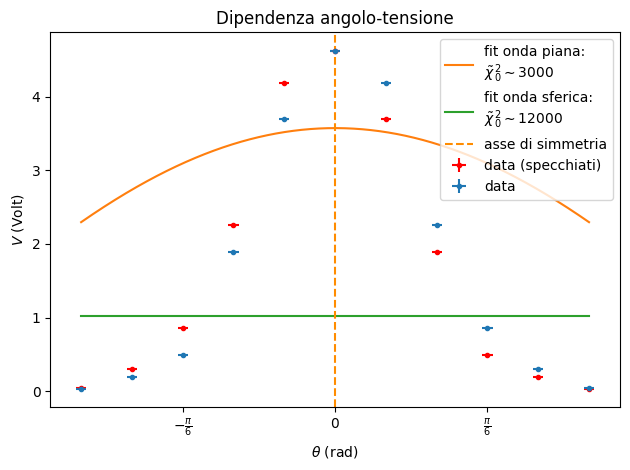

In [9]:
plt.errorbar(-θ, V, yerr=sigmaV, xerr=sigmaΘ, fmt='.',label='data (specchiati)',color='red')
plt.errorbar(θ, V, yerr=sigmaV, xerr=sigmaΘ, fmt='.',label='data')

plt.xticks([-np.pi/3,-1*np.pi/6,0,np.pi/6,np.pi/3],
           ['$-\\frac{\pi}{3}$', '$-\\frac{\pi}{6}$', '$0$', '$\\frac{\pi}{6}$', '$\\frac{\pi}{3}$'])

plt.plot(*fit_onda_piana.draw(),label=f'fit onda piana:\n$\\tilde\chi_0^2 \\sim 3000$')
plt.plot(np.linspace(θ.min(),θ.max(),100),fit_onda_sferica.values['A'] * np.ones(100),label=f'fit onda sferica:\n$\\tilde\chi_0^2 \\sim 12000$')

plt.axvline(x=0, color='darkorange', linestyle='--',label='asse di simmetria')

plt.title('Dipendenza angolo-tensione')
plt.xlabel('$\\theta$ (rad)')
plt.ylabel('$V$ (Volt)')
plt.tight_layout()

plt.legend(loc='upper right')
plt.show()

- la dipendenza è evidentemente non costante -> non si instaura un'onda sferica
- la dipendenza non sarà rispetto a cos teta -> non si instaura un'onda piana
- __la distribuzione è simmetrica rispetto all'asse di polarizzazione__